<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/Imbal_Classif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Random Oversampling

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
X, y = make_classification(n_samples= 10000, weights= [.99], flip_y= 0)

In [4]:
print(Counter(y))

Counter({0: 9900, 1: 100})


In [5]:
os = RandomOverSampler(sampling_strategy= 'minority')

In [6]:
X_o, y_o = os.fit_resample(X, y)

In [7]:
print(Counter(y_o))

Counter({0: 9900, 1: 9900})


In [8]:
#define step

In [9]:
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeL = Pipeline(steps= steps)

In [10]:
## Eval mod

In [11]:
cv1 = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipeL, X, y, scoring= 'f1_micro', cv = cv1, n_jobs= -1)
sc1 = np.mean(score1)

In [12]:
print(sc1)

0.9851


# UnderSample

In [13]:
## Random Undersample

In [14]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [15]:
X, y = make_classification(n_samples= 10000, weights= [0.99], flip_y= 0)

In [16]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [17]:
us1 = RandomUnderSampler(sampling_strategy = 'majority') #the sampling_strategy can also be set to 0.5 for 200 majority sample

In [18]:
X_o, y_o = us1.fit_resample(X, y)

In [19]:
print(Counter(y_o))

Counter({0: 100, 1: 100})


In [20]:
#def step

In [21]:
step1 = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipe1 = Pipeline(steps= step1)

In [22]:
#def model and cross-val-score

In [23]:
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 3, random_state = 1)
score1 = cross_val_score(pipe1, X, y, scoring = 'f1_micro', cv = cv, n_jobs= -1)

In [24]:
score1 = np.mean(score1)
print(score1)

0.8937333333333333


# **OVERSAMPLE**

In [25]:
# How To Create A SMOTE Dataset Using Python
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [26]:
## Create data
X, y = make_classification(n_samples = 100, n_features = 2, n_informative= 2, n_redundant= 0, n_clusters_per_class= 1, weights= [0.9], random_state= 10)

In [27]:
##counter
counter = Counter(y)
print(counter)

Counter({0: 91, 1: 9})


In [28]:
##SMOTE
os1 = SMOTE()
X, y = os1.fit_resample(X, y)

In [29]:
#count
counter1 = Counter(y)
print(counter1)

Counter({0: 91, 1: 91})


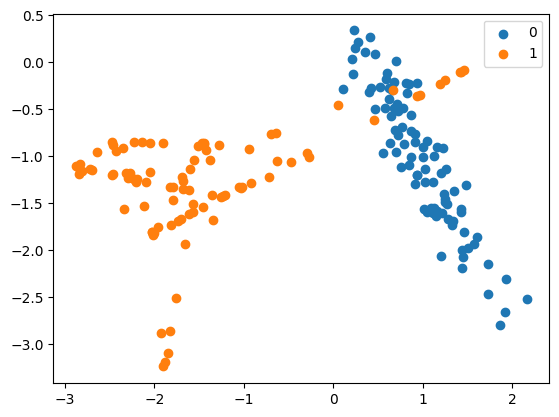

In [30]:
#viz
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label = str(label))
plt.legend()
plt.show()